In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for regression and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# random forest
from sklearn.ensemble import RandomForestRegressor
# grid search
from sklearn.model_selection import GridSearchCV

# Load preprocessed/filtered dataset

# Set display options and styling
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8-whitegrid')

# Create output directories for plots and frames if they don't exist
import os
if not os.path.exists('../plots'):
    os.makedirs('../plots')
if not os.path.exists('../frames'):
    os.makedirs('../frames')

**Load Preprocessed Data**

In [23]:
# csv contains only games with 100 or more ratings.
filtered_df = pd.read_csv('../frames/filtered_games.csv')
print(f"Loaded {filtered_df.shape[0]} games from filtered_games.csv")
display(filtered_df.head())

# Use only numeric columns and drop the target column from the feature set
numeric_cols = filtered_df.select_dtypes(include=[np.number]).columns.tolist()
if 'AvgRating' in numeric_cols:
    numeric_cols.remove('AvgRating')

print("Using features:", numeric_cols)
# Drop Nan rows
df_clean = filtered_df[numeric_cols + ['AvgRating']].dropna()
# Here, feature matrix is X and target y (avg rating)
X = df_clean[numeric_cols]
y = df_clean["AvgRating"]

Loaded 12239 games from filtered_games.csv


,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,GoodPlayers,NumOwned,NumWant,NumWish,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,MfgAgeRec,NumUserRatings,NumComments,NumAlternates,NumExpansions,NumImplementations,IsReimplementation,Family,Kickstarted,ImagePath,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,Set Collection,Tile Placement,Action Points,Investment,Market,Square Grid,Stock Holding,Victory Points as a Resource,Enclosure,Pattern Building,Pattern Recognition,Modular Board,Network and Route Building,Point to Point Movement,Melding and Splaying,Negotiation,Trading,Push Your Luck,Income,Race,Random Production,Variable Set-up,Roll / Spin and Move,Variable Player Powers,Action Queue,Bias,Grid Movement,Lose a Turn,Programmed Movement,Scenario / Mission / Campaign Game,Voting,Events,Paper-and-Pencil,Player Elimination,Role Playing,Movement Points,Simulation,Variable Phase Order,Area Movement,Commodity Speculation,Cooperative Game,Deduction,Sudden Death Ending,Connections,Highest-Lowest Scoring,Betting and Bluffing,Memory,Score-and-Reset Game,Layering,Map Addition,Secret Unit Deployment,Increase Value of Unchosen Resources,Ratio / Combat Results Table,Take That,Team-Based Game,Campaign / Battle Card Driven,Tech Trees / Tech Tracks,Player Judge,Chit-Pull System,Three Dimensional Movement,Action Drafting,Minimap Resolution,Stat Check Resolution,Action Timer,Pick-up and Deliver,Map Deformation,Bingo,Crayon Rail System,Multiple Maps,Hidden Roles,Line Drawing,Tug of War,Pattern Movement,Static Capture,Different Dice Movement,Chaining,Ladder Climbing,Predictive Bid,Solo / Solitaire Game,Line of Sight,Critical Hits and Failures,Interrupts,Zone of Control,Bribery,End Game Bonuses,Area-Impulse,Worker Placement,Measurement Movement,Map Reduction,Real-Time,Resource to Move,Mancala,Ownership,Kill Steal,Hidden Movement,Track Movement,Deck Construction,Drafting,TableauBuilding,Prisoner's Dilemma,Hidden Victory Points,Movement Template,Slide/Push,Targeted Clues,Command Cards,Grid Coverage,Relative Movement,Action/Event,Card Play Conflict Resolution,"I Cut, You Choose",Die Icon Resolution,Elapsed Real Time Ending,Advantage Token,Storytelling,Catch the Leader,Roles with Asymmetric Information,Traitor Game,Moving Multiple Units,Semi-Cooperative Game,Communication Limits,Time Track,Speed Matching,Cube Tower,Re-rolling and Locking,Impulse Movement,Loans,Delayed Purchase,"Deck, Bag, and Pool Building",Move Through Deck,Single Loser Game,Matching,Induction,Physical Removal,Narrative Choice / Paragraph,Pieces as Map,Follow,Finale Ending,Order Counters,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,Space Exploration,Civilization,Civil War,Movies / TV / Radio theme,Novel-based,Age of Reason,Mythology,Renaissance,American West,Animals,Modern Warfare,Medieval,Ancient,Nautical,Post-Napoleonic,Horror,Farming,Religious,Travel,Murder/Mystery,Pirates,Comic Book / Strip,Mature / Adult,Video Game Theme,Spies/Secret Agents,Arabian,Prehistoric,Trains,Aviation / Flight,Zombies,World War II,Racing,Pike and Shot,World War I,Humor,Sports,Mafia,American Indian Wars,Napoleonic,American Revolutionary War,Vietnam War,American Civil War,Number,Trivia,Music,Korean War,City Building,Political,Math,Maze,Theme_Food / Cooking,Theme_Superheroes,Theme_Anime / Manga,Theme_Cthulhu Mythos,Theme_Alternate History,Theme_Anthropomorphic 

Using features: ['BGGId', 'YearPublished', 'GameWeight', 'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Kickstarted', 'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens', 'Alliances', 'Area Majority / Influence', 'Auction/Bidding', 'Dice Rolling', 'Hand Management', 'Simultaneous Action Selection', 'Trick-taking', 'Hexagon Grid', 'Once-Per-Game Abilities', 'Set Collection', 'Tile Placement', 'Action Points', 'Investment', 'Market', 'Square Grid', 'Stock Holding', 'Victory Points as a Res

**Train Test Split**

In [24]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8087, 426)
Testing set shape: (2022, 426)


**Train the Linear Regression Model**

In [25]:
# create and fit model using sklearn!
model =  LinearRegression()
model.fit(X_train, y_train)

# Display ints and coeffs
print("Model Intercept:", model.intercept_)
print("Model Coefficients:")
for feature, coef in zip(numeric_cols, model.coef_):
    print(f"  {feature}: {coef:.4f}")

Model Intercept: 45.60871363754241
Model Coefficients:
  BGGId: 0.0000
  YearPublished: -0.0001
  GameWeight: 0.3061
  BayesAvgRating: 0.7341
  StdDev: -0.4857
  MinPlayers: -0.0105
  MaxPlayers: 0.0006
  ComAgeRec: 0.0126
  LanguageEase: 0.0000
  BestPlayers: -0.0511
  NumOwned: -0.0000
  NumWant: 0.0000
  NumWish: -0.0001
  NumWeightVotes: -0.0002
  MfgPlaytime: 0.0000
  ComMinPlaytime: -0.0000
  ComMaxPlaytime: 0.0000
  MfgAgeRec: -0.0073
  NumUserRatings: 0.0001
  NumComments: -0.0000
  NumAlternates: -0.0001
  NumExpansions: -0.0003
  NumImplementations: 0.0230
  IsReimplementation: 0.0033
  Kickstarted: 0.1119
  Rank:boardgame: -0.0000
  Rank:strategygames: 0.0001
  Rank:abstracts: -0.0002
  Rank:familygames: 0.0000
  Rank:thematic: 0.0000
  Rank:cgs: -0.0006
  Rank:wargames: -0.0002
  Rank:partygames: -0.0003
  Rank:childrensgames: -0.0008
  Cat:Thematic: 0.9653
  Cat:Strategy: 1.5113
  Cat:War: -4.2092
  Cat:Family: 0.6307
  Cat:CGS: -12.7807
  Cat:Abstract: -5.1679
  Cat:Party

**Evaluate the Model**

In [26]:
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# PRINT RESULTS
print("\nModel Performance:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  R² Score: {r2:.4f}")


Model Performance:
  Mean Squared Error (MSE): 0.1219
  Mean Absolute Error (MAE): 0.2557
  R² Score: 0.8166


**Display Results**

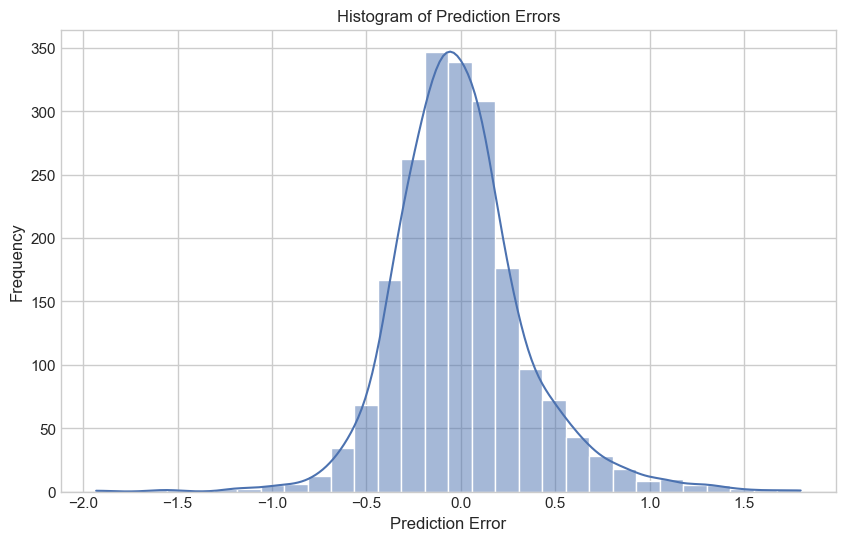

In [27]:

# Calculate errors
errs = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errs, bins=30, kde=True)
plt.title("Histogram of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.savefig('../plots/histogram_prediction_errors.png')
plt.show()
plt.close()

**Random Forest (SciKit Learn)**

In [28]:
# Define a parameter grid to search over
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 20],
#     'min_samples_split': [2, 5]
# }
# NOTE: Takes <1 hour to run. Try above commented params for faster results.
# Define a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearch cross validation
# Note that cv param is the num of folds
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid, cv=5,              
    scoring='r2',   
    n_jobs=-1,
    verbose=1
)

# Fit grid search to your training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R² score:", grid_search.best_score_)

# Use the best estimator to predict
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation R² score: 0.9561792635443181


***Comparing Linear Regression and Random Forest Models***

In [29]:
# Predictions from Linear Regression
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


# Predictions from Random Forest
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results !
print("Linear Regression Performance:")
print("  MSE:", mse_lr, "MAE:", mae_lr, "R²:", r2_lr)
print("Random Forest Performance:")
print("  MSE:", mse_rf, "MAE:", mae_rf, "R²:", r2_rf)

Linear Regression Performance:
  MSE: 0.12191679923602118 MAE: 0.2557174395332607 R²: 0.8166389613956415
Random Forest Performance:
  MSE: 0.027945497512314964 MAE: 0.09930565066878462 R²: 0.9579703906247267


**Visualize Results**

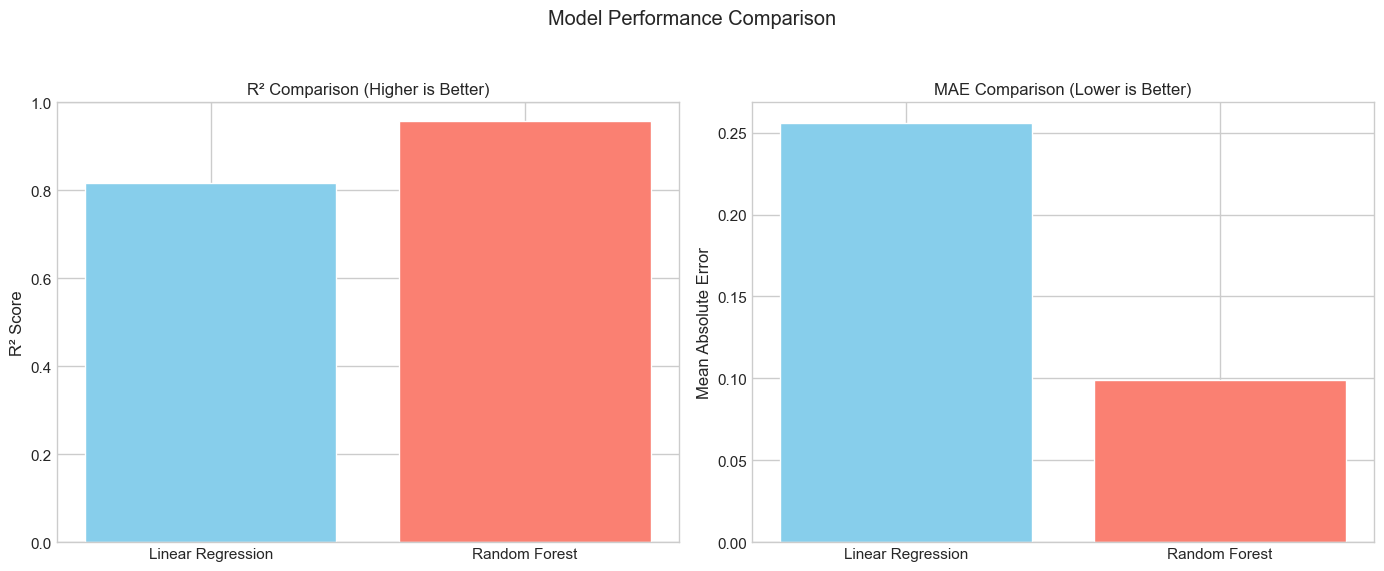

In [30]:
# Create a fig with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# R² Comparison: Higher is better!
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_lr, r2_rf]

ax1.bar(models, r2_scores, color=['skyblue', 'salmon'])
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1)
ax1.set_title('R² Comparison')

# MAE Comparison: Lower is better!!
mae_scores = [mae_lr, mae_rf]

ax2.bar(models, mae_scores, color=['skyblue', 'salmon'])
ax2.set_ylabel('Mean Absolute Error')
ax2.set_title('MAE Comparison')

plt.suptitle('Model Performance Comparison')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()